# Stock Price Prediction Problem

## Loading and Handling Data into Pandas

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [127]:
data = pd.read_csv('/home/sash/Documents/Sem_6/SMAI/Major_Project/Final-Data/FB.csv')
print data.head()
print '\n Data Types:'
print data.dtypes

  symbol        date       open       high        low      close     volume  \
0     FB  2012-05-18  42.049999  45.000000  38.000000  38.230000  573576400   
1     FB  2012-05-21  36.529999  36.660000  33.000000  34.029999  168192700   
2     FB  2012-05-22  32.610001  33.590000  30.940001  31.000000  101786600   
3     FB  2012-05-23  31.370001  32.500000  31.360001  32.000000   73600000   
4     FB  2012-05-24  32.950001  33.209999  31.770000  33.029999   50237200   

   adj_close  prev_day_diff  50_day_moving_avg  10_day_volatility  \
0  38.230000       0.000000          38.230000           0.000000   
1  34.029999      -4.200001          36.129999           2.100000   
2  31.000000      -3.029999          34.419999           3.419999   
3  32.000000       1.000000          33.814999           1.814999   
4  33.029999       1.029999          33.657999           0.628000   

   s&p_index_open  s&p_index_high  s&p_index_low  s&p_index_close  \
0     1305.050049     1312.239990    1291

Reading as datetime format:

In [128]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
# dateparse('1962-01')
data = pd.read_csv('/home/sash/Documents/Sem_6/SMAI/Major_Project/Final-Data/FB.csv', parse_dates='date', \
                   index_col='date',date_parser=dateparse)
print data.head()

           symbol       open       high        low      close     volume  \
date                                                                       
2012-05-18     FB  42.049999  45.000000  38.000000  38.230000  573576400   
2012-05-21     FB  36.529999  36.660000  33.000000  34.029999  168192700   
2012-05-22     FB  32.610001  33.590000  30.940001  31.000000  101786600   
2012-05-23     FB  31.370001  32.500000  31.360001  32.000000   73600000   
2012-05-24     FB  32.950001  33.209999  31.770000  33.029999   50237200   

            adj_close  prev_day_diff  50_day_moving_avg  10_day_volatility  \
date                                                                         
2012-05-18  38.230000       0.000000          38.230000           0.000000   
2012-05-21  34.029999      -4.200001          36.129999           2.100000   
2012-05-22  31.000000      -3.029999          34.419999           3.419999   
2012-05-23  32.000000       1.000000          33.814999           1.814999   

In [129]:
#check datatype of index
data.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2012-05-18, ..., 2016-03-08]
Length: 956, Freq: None, Timezone: None

In [130]:
#convert to time series:
ts = data['adj_close']
ts.head(10)

date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
2012-05-25    31.910000
2012-05-29    28.840000
2012-05-30    28.190001
2012-05-31    29.600000
2012-06-01    27.719999
Name: adj_close, dtype: float64

### Indexing TS arrays:

In [131]:
#1. Specific the index as a string constant:
ts['2012-05-18']

38.229999999999997

In [132]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(2015, 3, 26)]

83.010002

#Get range:

In [133]:
#1. Specify the entire range:
ts['2012-05-18':'2015-03-26']

date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
2012-05-25    31.910000
2012-05-29    28.840000
2012-05-30    28.190001
2012-05-31    29.600000
2012-06-01    27.719999
2012-06-04    26.900000
2012-06-05    25.870001
2012-06-06    26.809999
2012-06-07    26.309999
2012-06-08    27.100000
...
2015-03-06    80.010002
2015-03-09    79.440002
2015-03-10    77.550003
2015-03-11    77.570000
2015-03-12    78.930000
2015-03-13    78.050003
2015-03-16    78.070000
2015-03-17    79.360001
2015-03-18    80.910004
2015-03-19    82.750000
2015-03-20    83.800003
2015-03-23    84.430000
2015-03-24    85.309998
2015-03-25    82.919998
2015-03-26    83.010002
Name: adj_close, Length: 717

In [134]:
#2. Use ':' if one of the indices is at ends:
ts[:'2015-03-26']

date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
2012-05-25    31.910000
2012-05-29    28.840000
2012-05-30    28.190001
2012-05-31    29.600000
2012-06-01    27.719999
2012-06-04    26.900000
2012-06-05    25.870001
2012-06-06    26.809999
2012-06-07    26.309999
2012-06-08    27.100000
...
2015-03-06    80.010002
2015-03-09    79.440002
2015-03-10    77.550003
2015-03-11    77.570000
2015-03-12    78.930000
2015-03-13    78.050003
2015-03-16    78.070000
2015-03-17    79.360001
2015-03-18    80.910004
2015-03-19    82.750000
2015-03-20    83.800003
2015-03-23    84.430000
2015-03-24    85.309998
2015-03-25    82.919998
2015-03-26    83.010002
Name: adj_close, Length: 717

Note: ends included here

In [135]:
#All rows of 1962:
ts['2012']

date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
2012-05-25    31.910000
2012-05-29    28.840000
2012-05-30    28.190001
2012-05-31    29.600000
2012-06-01    27.719999
2012-06-04    26.900000
2012-06-05    25.870001
2012-06-06    26.809999
2012-06-07    26.309999
2012-06-08    27.100000
...
2012-12-10    27.840000
2012-12-11    27.980000
2012-12-12    27.580000
2012-12-13    28.240000
2012-12-14    26.809999
2012-12-17    26.750000
2012-12-18    27.709999
2012-12-19    27.410000
2012-12-20    27.360001
2012-12-21    26.260000
2012-12-24    26.930000
2012-12-26    26.510000
2012-12-27    26.049999
2012-12-28    25.910000
2012-12-31    26.620001
Name: adj_close, Length: 155

# Checking for stationarity

## Plot the time-series

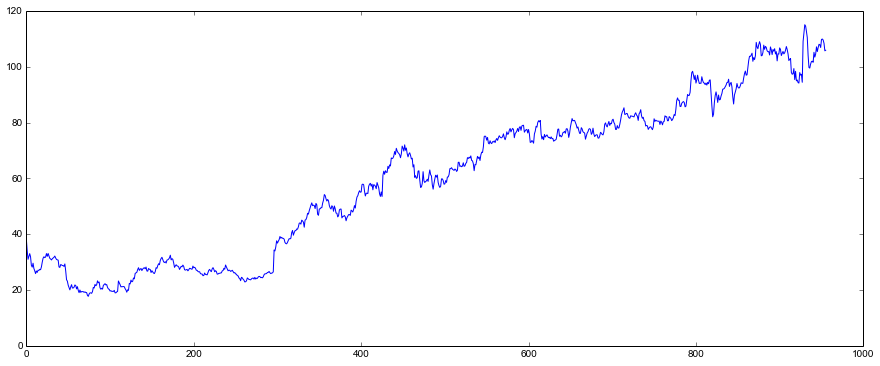

In [136]:
plt.plot(ts)

### Function for testing stationarity

In [137]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=20)
    rolstd = pd.rolling_std(timeseries, window=20)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['open','high','10_day_volatility', '50_day_moving_avg'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

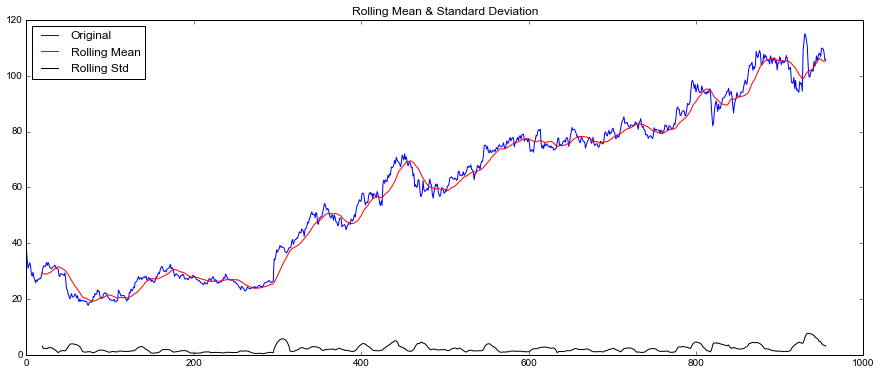

Results of Dickey-Fuller Test:
open                     -0.026673
high                      0.956270
10_day_volatility         6.000000
50_day_moving_avg       949.000000
Critical Value (5%)      -2.864590
Critical Value (1%)      -3.437259
Critical Value (10%)     -2.568394
dtype: float64


In [138]:
test_stationarity(ts)

# Making Data Stationary


## Estimating & Eliminating Trend


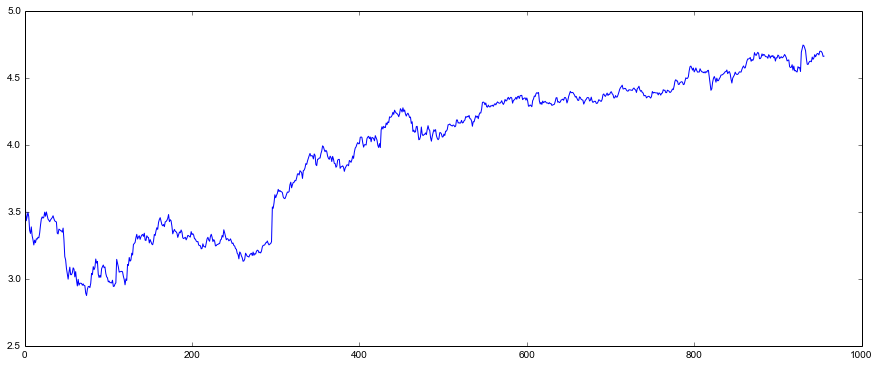

In [139]:
ts_log = np.log(ts)
plt.plot(ts_log)

## Smoothing:

### Moving average

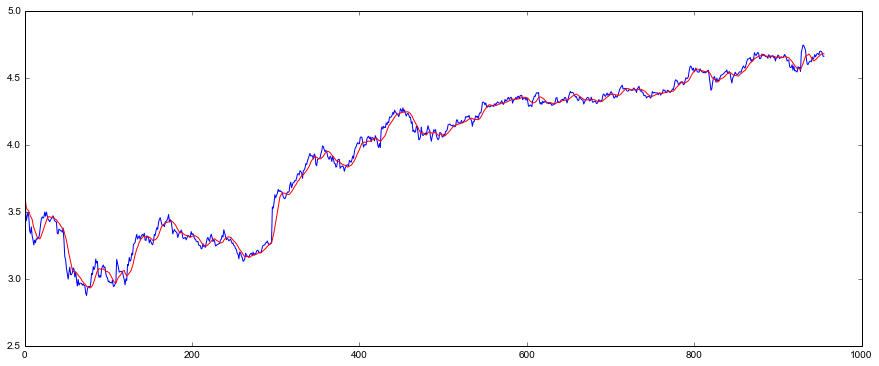

In [140]:
moving_avg = pd.rolling_mean(ts_log, 10, min_periods=1)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [141]:
print moving_avg

date
2012-05-18    3.643621
2012-05-21    3.585432
2012-05-22    3.534950
2012-05-23    3.517647
2012-05-24    3.513600
2012-05-25    3.505154
2012-05-29    3.484669
2012-05-30    3.466457
2012-05-31    3.457714
2012-06-01    3.444158
2012-06-04    3.409009
2012-06-05    3.381593
2012-06-06    3.367072
2012-06-07    3.347493
2012-06-08    3.327705
...
2016-02-17    4.641914
2016-02-18    4.633378
2016-02-19    4.627872
2016-02-22    4.630797
2016-02-23    4.636364
2016-02-24    4.643479
2016-02-25    4.650245
2016-02-26    4.655975
2016-02-29    4.660676
2016-03-01    4.668446
2016-03-02    4.672862
2016-03-03    4.678599
2016-03-04    4.682187
2016-03-07    4.680844
2016-03-08    4.681288
Length: 956


In [142]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(15)

date
2012-05-18    0.000000
2012-05-21   -0.058189
2012-05-22   -0.100963
2012-05-23   -0.051911
2012-05-24   -0.016184
2012-05-25   -0.042234
2012-05-29   -0.122906
2012-05-30   -0.127489
2012-05-31   -0.069940
2012-06-01   -0.122004
2012-06-04   -0.116882
2012-06-05   -0.128509
2012-06-06   -0.078297
2012-06-07   -0.077544
2012-06-08   -0.028171
dtype: float64

In [143]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

date
2012-05-18    0.000000
2012-05-21   -0.058189
2012-05-22   -0.100963
2012-05-23   -0.051911
2012-05-24   -0.016184
dtype: float64

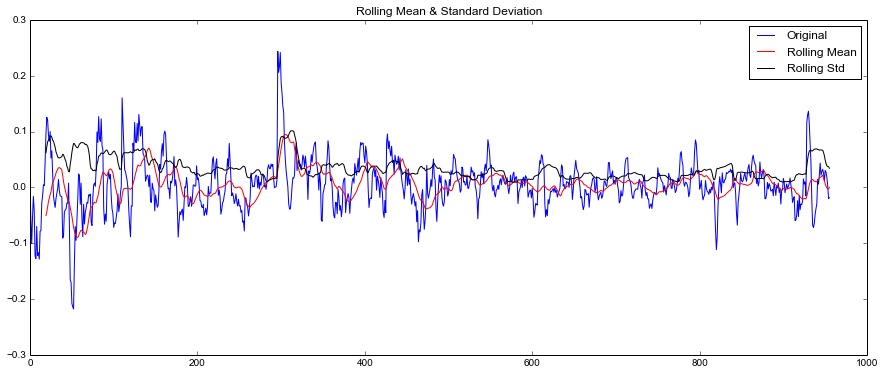

Results of Dickey-Fuller Test:
open                   -9.977879e+00
high                    2.153365e-17
10_day_volatility       5.000000e+00
50_day_moving_avg       9.500000e+02
Critical Value (5%)    -2.864587e+00
Critical Value (1%)    -3.437252e+00
Critical Value (10%)   -2.568392e+00
dtype: float64


In [144]:
test_stationarity(ts_log_moving_avg_diff)

### Exponentially Weighted Moving Average

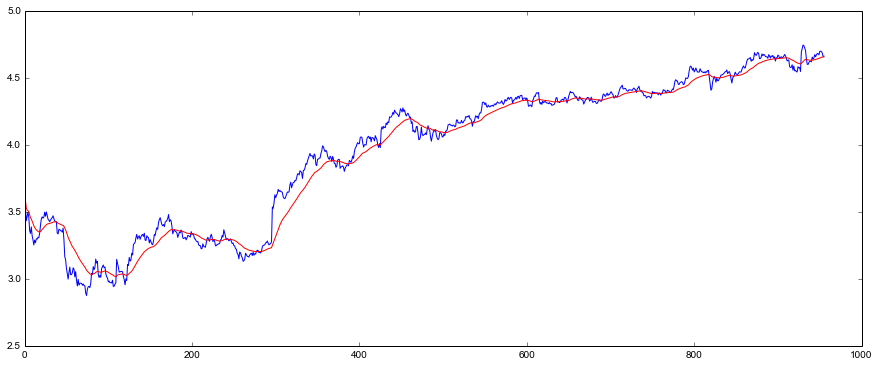

In [145]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

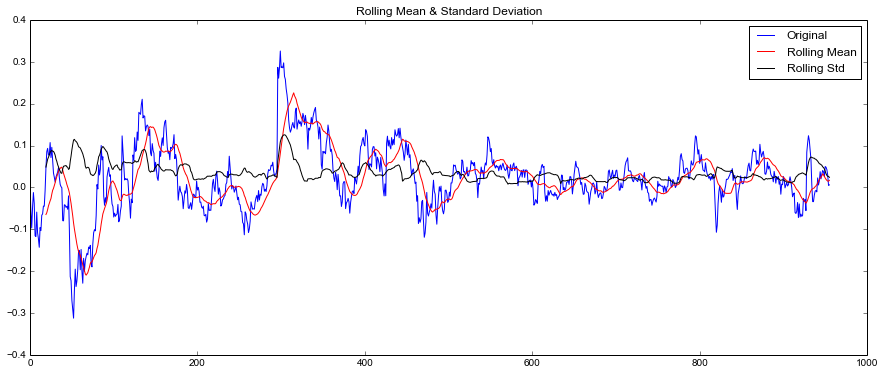

Results of Dickey-Fuller Test:
open                     -5.193435
high                      0.000009
10_day_volatility         0.000000
50_day_moving_avg       955.000000
Critical Value (5%)      -2.864571
Critical Value (1%)      -3.437216
Critical Value (10%)     -2.568384
dtype: float64


In [146]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

## Eliminating Trend and Seasonality

### Differencing:

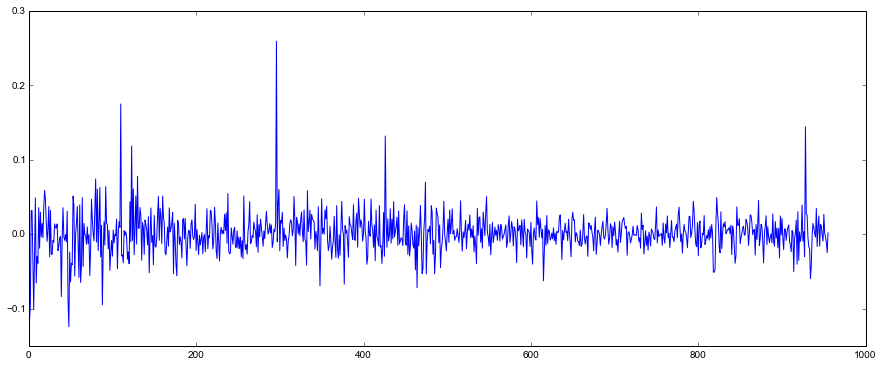

In [147]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

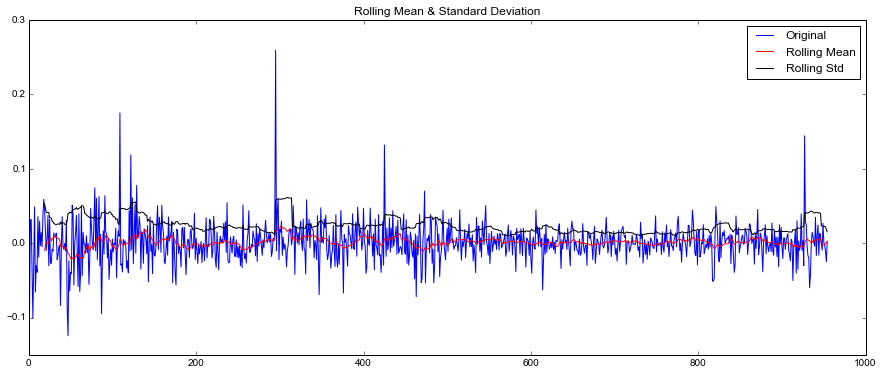

Results of Dickey-Fuller Test:
open                    -30.458521
high                      0.000000
10_day_volatility         0.000000
50_day_moving_avg       954.000000
Critical Value (5%)      -2.864574
Critical Value (1%)      -3.437223
Critical Value (10%)     -2.568386
dtype: float64


In [148]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Decomposition:

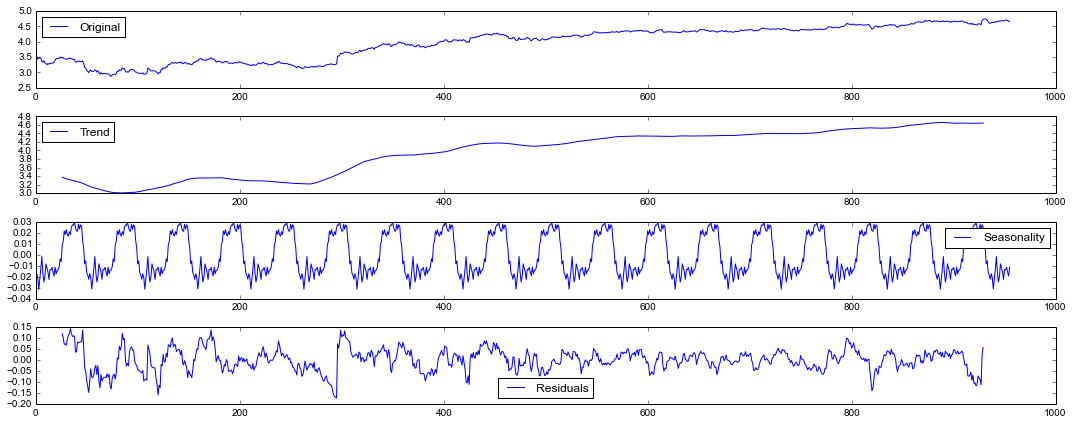

In [149]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq=52)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

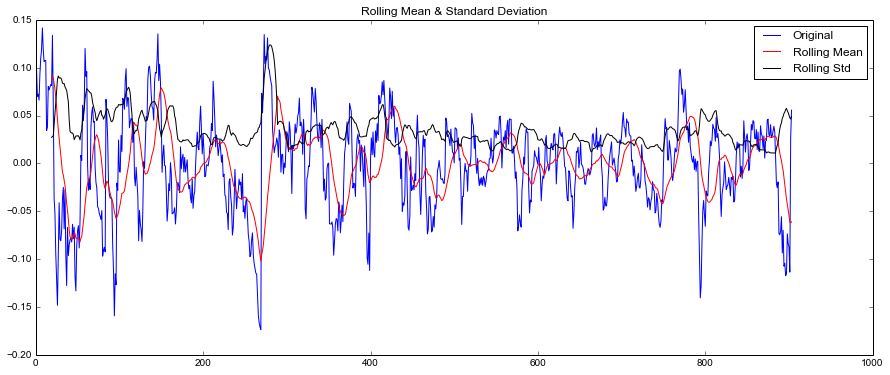

Results of Dickey-Fuller Test:
open                   -7.820168e+00
high                    6.703107e-12
10_day_volatility       7.000000e+00
50_day_moving_avg       8.960000e+02
Critical Value (5%)    -2.864771e+00
Critical Value (1%)    -3.437669e+00
Critical Value (10%)   -2.568490e+00
dtype: float64


In [150]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# Final Forecasting

In [151]:
from statsmodels.tsa.arima_model import ARIMA

### ACF & PACF Plots

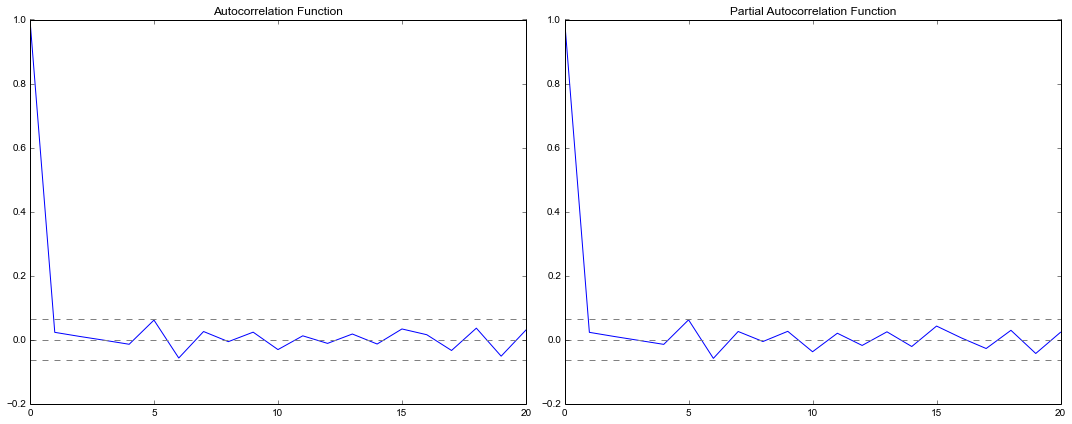

In [152]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### AR Model:

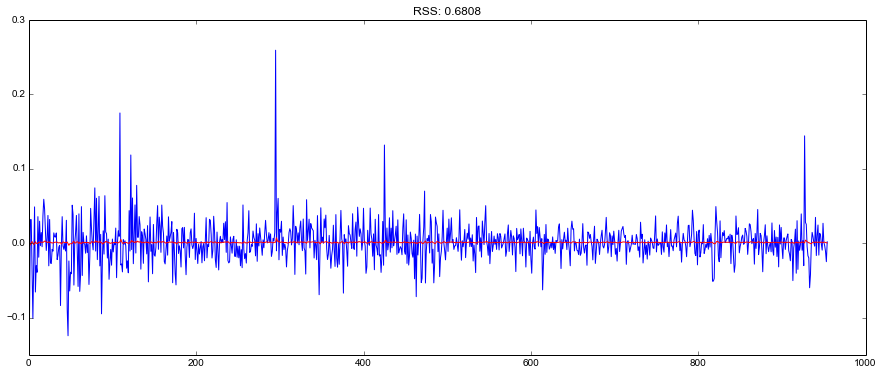

In [153]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA Model

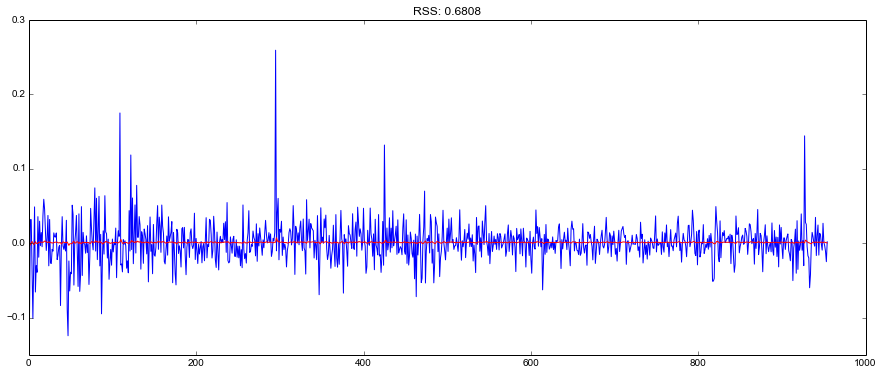

In [154]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### ARIMA Model:

/usr/local/lib/python2.7/dist-packages/statsmodels-0.8.0-py2.7-linux-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


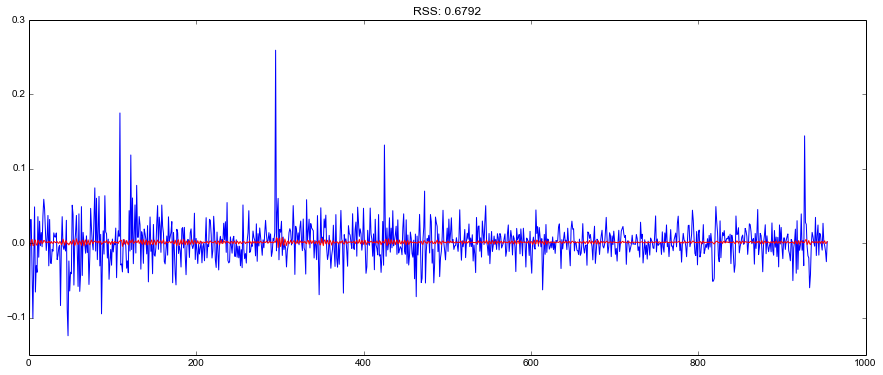

In [155]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS (Root Squared Sum): %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### Convert to original scale:

In [156]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

date
2012-05-21    0.001251
2012-05-22   -0.001721
2012-05-23   -0.003020
2012-05-24    0.003921
2012-05-25    0.005018
dtype: float64


In [157]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

date
2012-05-21    0.001251
2012-05-22   -0.000471
2012-05-23   -0.003491
2012-05-24    0.000431
2012-05-25    0.005448
dtype: float64


In [158]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

date
2012-05-18    3.643621
2012-05-21    3.644871
2012-05-22    3.643150
2012-05-23    3.640130
2012-05-24    3.644051
dtype: float64

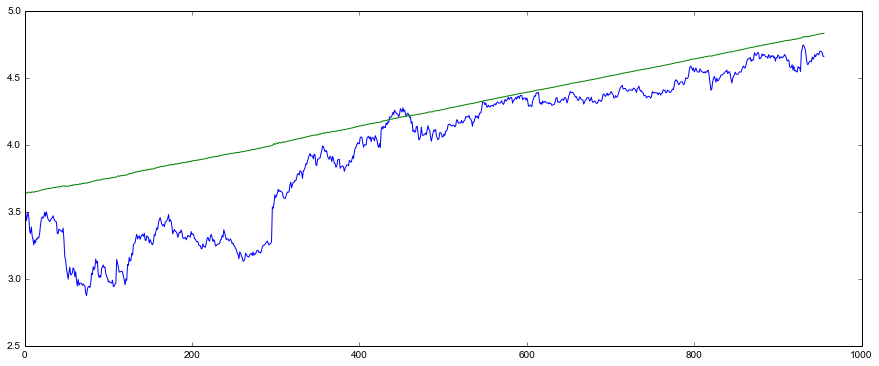

In [159]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

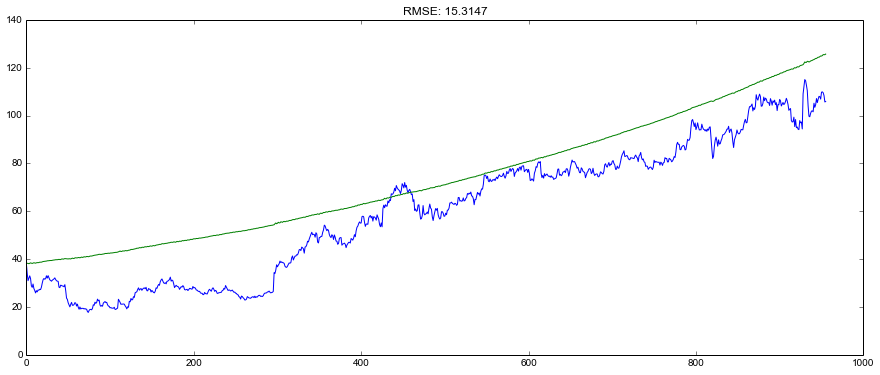

In [160]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))